## 4.10 Task Part 1 Coding Etiquette & Excel Reporting

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating stringpath variable for source file
path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 4\02-2024 Instacart Basket Analysis'

### 1.Import the data set you exported in Exercise 4.9

In [3]:
#importing lated merged dataframe
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_customer_final.pkl'))

In [4]:
#checking output
df.head()

key_column user_id  order_number  order_days_of_the_week  order_hour_of_day  \
0     180919      52            19                       3                  8   
1     180919      52            19                       3                  8   
2     180919      52            19                       3                  8   
3     180919      52            19                       3                  8   
4     180919      52            19                       3                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     8.0         196                  4          1   
1                     8.0       41787                  8          1   
2                     8.0       46149                  3          1   
3                     8.0       38928                  5          1   
4                     8.0       10441                  2          1   

               product_name  ...  median_days_since_prior_order  \
0                      Soda  ...                            8.0   
1            Bartlett Pears  ...                            8.0   
2         Zero Calorie Cola  ...                            8.0   
3  0% Greek Strained Yogurt  ...                            8.0   
4       Dry Roasted Almonds  ...                            8.0   

      frequency_flag  First Name Last_Name     STATE Age Number_of_dependants  \
0  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
1  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
2  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
3  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
4  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   

                      Family_Status income  _merge  
0  living with parents and siblings  56831    both  
1  living with parents and siblings  56831    both  
2  living with parents and siblings  56831    both  
3  living with parents and siblings  56831    both  
4  living with parents and siblings  56831    both  

[5 rows x 31 columns]

### 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

#### a. classify the data to identify what constitutes PII such as First_Nmae, Last_Name, Age, FamilyStatus and income columns

#### b. Based on the company  follow steps to reduce the risk of unauthorized access or disclosure

#### c.  Encrypt the dataset, both in transit and at rest, to protect it from unauthorized access if needed

#### d. Minimize the amount of PII collected and stored to reduce the potential impact of a security breach by dropping columns with PII info not needed for analysis

### 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.


#### Create new column called Regions with above 
#### Creat a mean, min, max of orders based on Region with group by function

In [5]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York',
'Pennsylvania','New Jersey']), 'Region'] = 'Northeast'

In [6]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Midwest'

In [7]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'Region'] = 'South'

In [8]:
#Create new column called Regions
# Create new column called Regions
df.loc[df['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'West'


In [9]:
#check frequency of Region column
df['Region'].value_counts(dropna = False)

Region
South        652456
West         498836
Midwest      461008
Northeast    342867
Name: count, dtype: int64

In [10]:
#Creat a mean, min, max of orders by group by function to evaluate customer behaviour
df_cust_behav = df.groupby('Region').agg({'order_number':['mean', 'min', 'max']})

In [11]:
#checking output
df_cust_behav.value_counts(dropna = False)

(order_number, mean)  (order_number, min)  (order_number, max)
17.098389             1                    99                     1
17.245299             1                    99                     1
17.258414             1                    99                     1
17.307264             1                    99                     1
Name: count, dtype: int64

#### Mean is of more use to evaluate customer behaviour, rounding mean to 2 decimal points

In [12]:
#Rounding mean to 2 decimal points
df_cust_behav_mean =df_cust_behav['order_number']['mean'].round(2)

In [13]:
#checking output
df_cust_behav_mean.head()

Region
Midwest      17.26
Northeast    17.25
South        17.31
West         17.10
Name: mean, dtype: float64

### 3.Determine whether there’s a difference in spending habits between the different U.S. regions

In [14]:
#creating crosstabs
crosstab = pd.crosstab(df['Region'], df['spending_flag'])

In [15]:
#viewing in excel
crosstab.to_clipboard()

### Result

In [16]:
#Region	  High Spender    Low Spender

#Midwest    9428           451580

#Northeast	6678	        336189

#South	    12478	        639978

#West	    10536	        488300

### 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Aggregating count of order_number by groupby()

In [17]:
#Group customers by count of order_number
df['count_order'] = df.groupby(['user_id'])['order_number'].transform('count')

### Create column with low activity customers. Less than 5 orders

In [18]:
# Create column with low activity customers. Less than 5 orders
df.loc[df['count_order'] < 5, 'low_activity_flag'] = 'Low Activity'

In [19]:
#checking frequency of low_activity_flag
df['low_activity_flag'].value_counts(dropna= False)

low_activity_flag
nan             1914260
Low Activity      40907
Name: count, dtype: int64

### Creating subset df_low_activity

In [20]:
#Creating subset df_low_activity
df_low_activity = df[df['low_activity_flag'] == 'Low Activity']

In [21]:
#Checking the subset
df_low_activity['low_activity_flag']

22         Low Activity
23         Low Activity
73         Low Activity
74         Low Activity
75         Low Activity
               ...     
1955158    Low Activity
1955159    Low Activity
1955160    Low Activity
1955162    Low Activity
1955166    Low Activity
Name: low_activity_flag, Length: 40907, dtype: object

### Droping Rows with low activity from dataframe

In [22]:
#dropping Rows with low activity from dataframe
df_updated = df.drop(df[df['low_activity_flag'] == 'Low Activity'].index)

In [23]:
#checking new dataframe
df_updated.head()

key_column user_id  order_number  order_days_of_the_week  order_hour_of_day  \
0     180919      52            19                       3                  8   
1     180919      52            19                       3                  8   
2     180919      52            19                       3                  8   
3     180919      52            19                       3                  8   
4     180919      52            19                       3                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     8.0         196                  4          1   
1                     8.0       41787                  8          1   
2                     8.0       46149                  3          1   
3                     8.0       38928                  5          1   
4                     8.0       10441                  2          1   

               product_name  ...  Last_Name     STATE  Age  \
0                      Soda  ...      Roach  Nebraska   21   
1            Bartlett Pears  ...      Roach  Nebraska   21   
2         Zero Calorie Cola  ...      Roach  Nebraska   21   
3  0% Greek Strained Yogurt  ...      Roach  Nebraska   21   
4       Dry Roasted Almonds  ...      Roach  Nebraska   21   

  Number_of_dependants                     Family_Status income _merge  \
0                    3  living with parents and siblings  56831   both   
1                    3  living with parents and siblings  56831   both   
2                    3  living with parents and siblings  56831   both   
3                    3  living with parents and siblings  56831   both   
4                    3  living with parents and siblings  56831   both   

    Region count_order  low_activity_flag  
0  Midwest          10                nan  
1  Midwest          10                nan  
2  Midwest          10                nan  
3  Midwest          10                nan  
4  Midwest          10                nan  

[5 rows x 34 columns]

In [24]:
#checking if all were deleted
df_low_activity.shape

(40907, 34)

In [25]:
df.shape[0] - df_updated.shape[0]

40907

#### Exact amount of rows with Low Activity was 40907 which was dropped from the dataframe.
#### Customers with less than 5 orders have been excluded from the data

### Exporting df_updated

In [26]:
#exporting
df_updated.to_pickle(os.path.join(path, 'Data', 'Prepared Data','df_without_LowActivity_Customers.pkl'))


### 5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Steps to create customer profile for  marketing and business strategy
#### Import dataframe departments 
#### Create a dataframe with columns: age, income, department_id, number of dependents, orders_day_of_week, order_hour_of_day
#### Creating conditions for profiles


In [27]:
#Import dataframe departments
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'departments.csv'),index_col = False)


In [28]:
#check dataframe
df_dept.head()

department_id       1      2       3        4        5              6  \
0    department  frozen  other  bakery  produce  alcohol  international   

           7     8                9  ...            12      13         14  \
0  beverages  pets  dry goods pasta  ...  meat seafood  pantry  breakfast   

             15          16         17      18      19    20       21  
0  canned goods  dairy eggs  household  babies  snacks  deli  missing  

[1 rows x 22 columns]

In [29]:
df_updated.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge', 'Region',
       'count_order', 'low_activity_flag'],
      dtype='object')

In [30]:
#create a dataframe with columns: age, income, department_id, number of dependents, orders_day_of_week, order_hour_of_day
df_profile = df_updated[['Age', 'income','department_id','Number_of_dependants', 'order_days_of_the_week', 'order_hour_of_day','Region']]

In [31]:
#checking output of df_profile
df_profile.head()

Age  income  department_id  Number_of_dependants  order_days_of_the_week  \
0   21   56831              7                     3                       3   
1   21   56831              4                     3                       3   
2   21   56831              7                     3                       3   
3   21   56831             16                     3                       3   
4   21   56831             19                     3                       3   

   order_hour_of_day   Region  
0                  8  Midwest  
1                  8  Midwest  
2                  8  Midwest  
3                  8  Midwest  
4                  8  Midwest

### Creating conditions for profiles

In [32]:
#Creating conditions for profiles
#Age:less than 30: Young Adult
    #More than and equal to 30 & Less than and equal to 50 is Middle Age Adult
    #Greater than 50 is Senior adult


In [33]:
df_updated.loc[df_profile['Age'] < 30 , 'Age_Criteria'] = 'Young Adult'

In [34]:
df_updated.loc[(df_profile['Age'] >= 30) & (df_profile['Age'] <= 50), 'Age_Criteria'] = 'Middle Age Adult'

In [35]:
df_updated.loc[df_profile['Age'] > 50 , 'Age_Criteria'] = 'Senior Adult'

In [36]:
#check frequency
df_updated['Age_Criteria'].value_counts(dropna = False)

Age_Criteria
Senior Adult        926342
Middle Age Adult    630710
Young Adult         357208
Name: count, dtype: int64

In [37]:
# Income > 90,000 High Income
        #< 90,000 Low Income

In [38]:
df_updated.loc[df_profile['income'] < 90000 , 'Income_Criteria'] = 'Low Income'

In [39]:
df_updated.loc[df_profile['income'] > 90000 , 'Income_Criteria'] = 'High Income'

In [40]:
#check frequency
df_updated['Income_Criteria'].value_counts(dropna = False)

Income_Criteria
High Income    1018680
Low Income      895580
Name: count, dtype: int64

In [41]:
# Department_id = 'Baby'/18: parent of Baby
#               =  'Pets/8': Owner of Animal

In [42]:
df_updated.loc[df_profile['department_id'] == 18 , 'Baby/Pet Purchases'] = 'Parent of Baby'

In [43]:
df_updated.loc[df_profile['department_id'] == 8 , 'Baby/Pet Purchases'] = 'Owner of Pet'

In [44]:
# No of dependants > 0 Parent
#                  < 0 No dependants

In [45]:

df_updated.loc[df_profile['Number_of_dependants'] < 0 , 'Dependants'] = 'None'

In [46]:
df_updated.loc[df_profile['Number_of_dependants'] > 0 , 'Dependants'] = 'Parent'

In [47]:
#Order day of week: Saturday and Sunday [0,1] = Weekend Shopper
#                   Other days: Weekday shopper

In [48]:
df_updated.loc[df_profile['order_days_of_the_week'].isin([0,1]) , 'Day_Criteria'] = 'Weekend Shopper'

In [49]:
df_updated.loc[df_profile['order_days_of_the_week'].isin([2,3,4,5,6,7]) , 'Day_Criteria'] = 'Weekday Shopper'

In [50]:
#Order Hour of day: <= 6 and >20 late night Shopper
#                   <= 12 Morning Shopper
#                   <=18 Afternoon Shopper
#                   >18 and <= 20 Evening Shopper

In [51]:
df_updated.loc[(df_profile['order_hour_of_day'] <= 6) & (df_profile['order_hour_of_day'] >20) , 'Time_Criteria'] = 'Late Night Shopper'

In [52]:
df_updated.loc[(df_profile['order_hour_of_day'] <= 12), 'Time_Criteria'] = 'Morning Shopper'

In [53]:
df_updated.loc[(df_profile['order_hour_of_day'] <= 18), 'Time_Criteria'] = 'Afternoon Shopper'

In [54]:
df_updated.loc[(df_profile['order_hour_of_day'] > 18) & (df_profile['order_hour_of_day'] < 20) , 'Time_Criteria'] = 'Evening Shopper'

### Checking new columns in df_profile

In [55]:
df_updated.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge', 'Region',
       'count_order', 'low_activity_flag', 'Age_Criteria', 'Income_Criteria',
       'Baby/Pet Purchases', 'Dependants', 'Day_Criteria', 'Time_Criteria'],
      dtype='object')

### Customer profile based on above new columns

In [56]:
df_visual = df_updated[['Age_Criteria', 'Income_Criteria', 'Baby/Pet Purchases', 'Dependants','Day_Criteria', 'Time_Criteria']].value_counts(dropna = False)

### 6. Create an appropriate visualization: Bar Chart to show the distribution of profiles
#### Generating a bar chart to assess customer behavior, utilizing the mean order values across different regions.
#### Relationship age and avg price
#### Bar Chart based on Income and Regions



### Generating a bar chart to assess customer behavior, utilizing the mean order values across different regions.

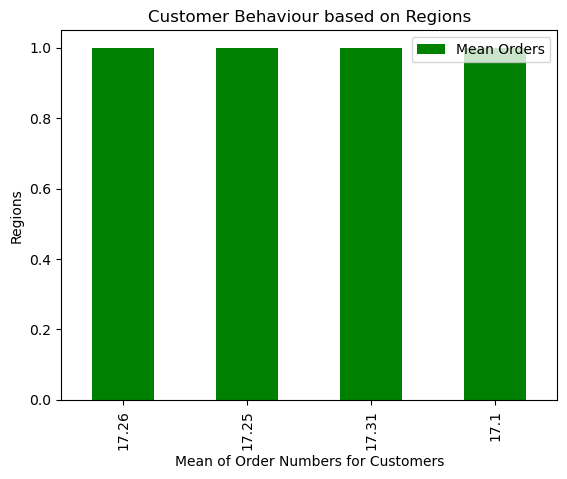

In [57]:
#creating bar chart
df_bar = df_cust_behav_mean.value_counts().plot.bar(color = ['green'])

#adding title to bar chart
plt.title('Customer Behaviour based on Regions')

#adding X-axis label
plt.xlabel('Mean of Order Numbers for Customers')
           
#adding y-axis label
plt.ylabel('Regions')

#displaying legend
plt.legend(['Mean Orders'])

#### No difference noted in customer behaviours based on Regions

### Relationship age and avg price

Text(0, 0.5, 'Prices')

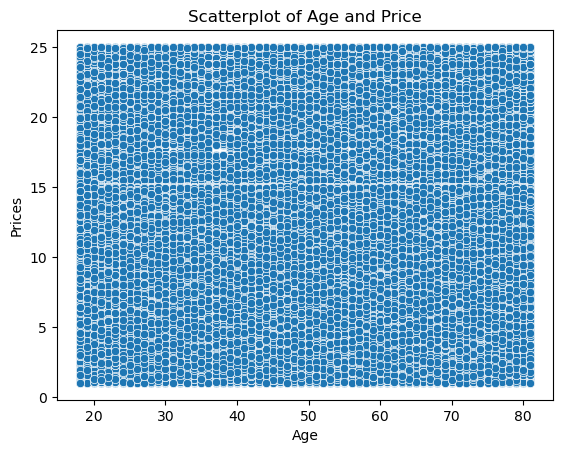

In [58]:
##### Relationship between Age and Average Price
#creating a scatterplot
scat_1 = sns.scatterplot(x ='Age', y = 'prices', data = df_updated)

#adding title to bar chart
plt.title('Scatterplot of Age and Price')

#adding X-axis label
plt.xlabel('Age')
           
#adding y-axis label
plt.ylabel('Prices')

#### The scatterplot depicting the relationship between age and prices reveals a high degree of variability with points scattered throughout the plot. There is no apparent linear trend or pattern, suggesting that age alone does not provide an indication of income. The wide dispersion of points indicates considerable diversity in income levels across different age group

In [59]:

#creating a sample data 80/20
np.random.seed(4)
dev = np.random.rand(len(df_updated)) <= 0.8

In [60]:

#create two samples
big_sample = df_updated[dev]
small_sample = df_updated[~dev]

In [61]:
#checking output of samples by checkint the no of rows
len(df_updated) == len(small_sample) + len(big_sample)

True

In [62]:
df_line = small_sample[['order_days_of_the_week', 'prices','Region','Age']]

In [63]:
#checking output
df_line.columns

Index(['order_days_of_the_week', 'prices', 'Region', 'Age'], dtype='object')

### Bar Chart based on Income and Regions

In [64]:
df_updated.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge', 'Region',
       'count_order', 'low_activity_flag', 'Age_Criteria', 'Income_Criteria',
       'Baby/Pet Purchases', 'Dependants', 'Day_Criteria', 'Time_Criteria'],
      dtype='object')

In [86]:
# Set figure size with wider dimensions
plt.figure(figsize=(12, 6))

# Plotting a bar chart
Region_Income = grouped_data.plot(kind='bar', stacked=False, color=['green', 'maroon', 'navy', 'orange'])

# Adding title to the bar chart
plt.title('Customer Income based on Regions')

# Adding X-axis label
plt.xlabel('Income Criteria')

# Adjusting x-axis labels angle and setting alignment to center
plt.xticks(rotation=45, ha='center')

# Adding y-axis label
plt.ylabel('Number of Customers')

# Displaying the legend
plt.legend(title='Region', loc='upper center')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('customer_income_regions.png', dpi=300)  # Change file name and format as needed

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

In [87]:
#export
Region_Income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','Region_income.png'))

### Age and Order days of week

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


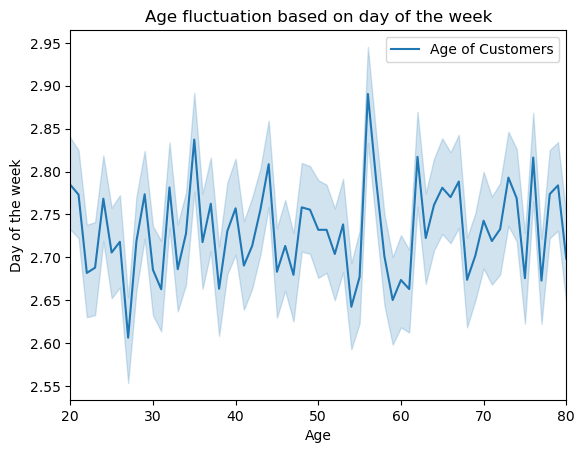

In [66]:
# Creating a line chart
line = sns.lineplot(data= df_line, y='order_days_of_the_week', x='Age')

# Adding title to the line chart
plt.title('Age fluctuation based on day of the week')

# Adding X-axis label
plt.ylabel('Day of the week')

# Adding y-axis label
plt.xlabel('Age')

# Setting the y-axis limits to show values only between 20 and 80
plt.xlim(20, 80)

# Displaying legend
plt.legend(['Age of Customers'])

# Show the plot
plt.show()





### 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [67]:
df_updated.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge', 'Region',
       'count_order', 'low_activity_flag', 'Age_Criteria', 'Income_Criteria',
       'Baby/Pet Purchases', 'Dependants', 'Day_Criteria', 'Time_Criteria'],
      dtype='object')

### Min max and mean on Age, income, department_id,'Number_of_dependants','order_days_of_the_week','order_hour_of_day'

In [68]:

# Define the columns for which to calculate min, max, and mean
columns_to_aggregate = ['Age', 'income', 'department_id', 'Number_of_dependants', 'order_days_of_the_week', 'order_hour_of_day']

# Calculate min, max, and mean for the specified columns
agg_results = df_updated[columns_to_aggregate].agg(['min', 'max', 'mean'])
agg_results

Age         income  department_id  Number_of_dependants  \
min   18.000000   25937.000000       1.000000              0.000000   
max   81.000000  593901.000000      21.000000              3.000000   
mean  49.502675   94691.926785       9.924418              1.499646   

      order_days_of_the_week  order_hour_of_day  
min                 0.000000           0.000000  
max                 6.000000          23.000000  
mean                2.734425          13.408286

### Aggregrate values on Region

In [69]:
df_updated.groupby('Region').agg({'income':['mean','min','max']})

income               
                   mean    min     max
Region                                
Midwest    94933.528557  25986  579397
Northeast  94867.338802  26095  584097
South      94531.460479  25979  591089
West       94558.010686  25937  593901

In [70]:
df_updated.groupby('Region').agg({'Number_of_dependants':['mean','min','max']})

Number_of_dependants        
                          mean min max
Region                                
Midwest               1.504997   0   3
Northeast             1.492749   0   3
South                 1.499630   0   3
West                  1.499455   0   3

### Aggregrate values on Age criteria

In [71]:
df_updated.groupby('Age_Criteria').agg({'income':['mean','min','max']})

income               
                           mean    min     max
Age_Criteria                                  
Middle Age Adult   87812.161638  25941  592409
Senior Adult      109860.847726  29001  593901
Young Adult        67501.964950  25937  392552

In [72]:
df_updated.groupby('Age_Criteria').agg({'Number_of_dependants':['mean','min','max']})

Number_of_dependants        
                                 mean min max
Age_Criteria                                 
Middle Age Adult             1.499046   0   3
Senior Adult                 1.500823   0   3
Young Adult                  1.497654   0   3

### Aggregrate values on Income_Criteria

In [73]:
df_updated.groupby('Income_Criteria').agg({'income':['mean','min','max']})

income               
                          mean    min     max
Income_Criteria                              
High Income      126457.601886  90002  593901
Low Income        58559.969939  25937   89999

In [74]:
df_updated.groupby('Income_Criteria').agg({'Number_of_dependants':['mean','min','max']})

Number_of_dependants        
                                mean min max
Income_Criteria                             
High Income                 1.502450   0   3
Low Income                  1.496456   0   3

### Aggregrate values on Baby/Pet Purchases

In [75]:
df_updated.groupby('Baby/Pet Purchases').agg({'income':['mean','min','max']})

income               
                            mean    min     max
Baby/Pet Purchases                             
Owner of Pet        94965.202228  26158  573617
Parent of Baby      94729.073030  26116  544896
nan                 94690.577502  25937  593901

In [76]:
df_updated.groupby('Baby/Pet Purchases').agg({'Number_of_dependants':['mean','min','max']})

Number_of_dependants        
                                   mean min max
Baby/Pet Purchases                             
Owner of Pet                   1.510026   0   3
Parent of Baby                 1.511288   0   3
nan                            1.499456   0   3

### Aggregrate values on Dependants

In [77]:
df_updated.groupby('Dependants').agg({'income':['mean','min','max']})

income               
                    mean    min     max
Dependants                             
Parent      94724.149846  25937  593901
nan         94595.690571  25979  584097

In [78]:
df_updated.groupby('Dependants').agg({'Number_of_dependants':['mean','min','max']})

Number_of_dependants        
                           mean min max
Dependants                             
Parent                 2.001777   1   3
nan                    0.000000   0   0

### Aggregrate values on Day_Criteria

In [79]:
df_updatedgroupby('Day_Criteria').agg({'income':['mean','min','max']})

NameError: name 'df_updatedgroupby' is not defined

In [ ]:
df_updated.groupby('Day_Criteria').agg({'Number_of_dependants':['mean','min','max']})

### Aggregrate values on Time_Criteria

In [ ]:
df_updated.groupby('Time_Criteria').agg({'income':['mean','min','max']})

In [ ]:
df_updated.groupby('Time_Criteria').agg({'Number_of_dependants':['mean','min','max']})

### 8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.